## Project - News Recommendation System

### Problem Statement:

iPrint is an upcoming media house in India that offers media and information services to the people. The company’s business extends across a wide range of media, including news and information services on sports, weather, education, health, research, stocks and healthcare. Over the years, through its online application, iPrint has been efficiently delivering news and information to the common people. However, with time and technological advancements, several new competitors of iPrint have emerged in the market. Hence, it has decided to begin providing a more personalised experience to its customers.

iPrint wants you as a data scientist to identify and build an appropriate recommendation system that would:

 - Recommend new top 10 relevant articles to a user when he visits the app at the start of the day
 - Recommend top 10 similar news articles that match the ones clicked by the user.


You have to ensure that the system does not recommend any news article that has been pulled out from the app or has already been seen by the user. The final generated list must contain the names of the recommended articles, along with their IDs.

#### Importing the required modules and datasets

In [73]:
#Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime,timedelta
import re
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk import download
from nltk import word_tokenize         
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

download('punkt')
download('stopwords')
               
stop_words = stopwords.words('english')

from gensim import corpora
from gensim.models import TfidfModel
from gensim.models import LsiModel
from gensim.similarities import MatrixSimilarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups


            

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pallavideolal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pallavideolal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pallavideolal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pallavideolal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/pallavideolal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pallavideolal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pal

In [74]:
#loading the datasets

df_platform = pd.read_csv('platform_content.csv')

In [75]:
df_platform.head(5)

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,1459192779,content_pulled_out,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,content_present,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,content_present,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,content_present,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [76]:
df_platform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       3122 non-null   int64 
 1   interaction_type      3122 non-null   object
 2   item_id               3122 non-null   int64 
 3   producer_id           3122 non-null   int64 
 4   producer_session_id   3122 non-null   int64 
 5   producer_device_info  680 non-null    object
 6   producer_location     680 non-null    object
 7   producer_country      680 non-null    object
 8   item_type             3122 non-null   object
 9   item_url              3122 non-null   object
 10  title                 3122 non-null   object
 11  text_description      3122 non-null   object
 12  language              3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


In [77]:
df_platform.shape

(3122, 13)

The dataset platform_content.csv has 13 columns and 3122 rows. 
Let's look at the missing values

In [78]:
print('nMissing values:  ', df_platform.isnull().sum().values.sum())
df_platform.isnull().sum()

nMissing values:   7326


event_timestamp            0
interaction_type           0
item_id                    0
producer_id                0
producer_session_id        0
producer_device_info    2442
producer_location       2442
producer_country        2442
item_type                  0
item_url                   0
title                      0
text_description           0
language                   0
dtype: int64

In [79]:
df_platform.nunique()

event_timestamp         3121
interaction_type           2
item_id                 3057
producer_id              252
producer_session_id     2017
producer_device_info     114
producer_location         19
producer_country           5
item_type                  3
item_url                3029
title                   3011
text_description        3019
language                   5
dtype: int64

In [80]:
df_platform.language.unique()

array(['en', 'pt', 'es', 'la', 'ja'], dtype=object)

There are articles in 5 different languages in the platform_content.csv dataset. We need to make sure that only the articles that are written in the English language are considered, as specified in the problem statement. 

Statistical properties of the dataset:

In [81]:
df_platform.describe()

,event_timestamp,item_id,producer_id,producer_session_id
count,3.122000e+03,3.122000e+03,3.122000e+03,3.122000e+03
mean,1.468804e+09,3.284110e+16,3.984819e+17,1.976675e+17
std,7.571512e+06,5.383734e+18,4.387115e+18,5.403753e+18
min,1.459193e+09,-9.222795e+18,-9.120686e+18,-9.212055e+18
25%,1.462369e+09,-4.660869e+18,-1.578288e+18,-4.651280e+18
50%,1.467136e+09,4.436584e+16,-7.092877e+17,4.154103e+17
75%,1.473873e+09,4.745617e+18,3.609194e+18,4.841644e+18
max,1.488308e+09,9.222265e+18,9.210531e+18,9.221043e+18


In [82]:
#Importing the second dataset

df_consumer = pd.read_csv('consumer_transanctions.csv')
df_consumer.head(5)

,event_timestamp,interaction_type,item_id,consumer_id,consumer_session_id,consumer_device_info,consumer_location,country
0,1465413032,content_watched,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,content_watched,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,content_watched,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,content_followed,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,content_watched,-7820640624231356730,-445337111692715325,561148 1178424124714,NaN,NaN,NaN


In [83]:
df_consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       72312 non-null  int64 
 1   interaction_type      72312 non-null  object
 2   item_id               72312 non-null  int64 
 3   consumer_id           72312 non-null  int64 
 4   consumer_session_id   72312 non-null  object
 5   consumer_device_info  56918 non-null  object
 6   consumer_location     56907 non-null  object
 7   country               56918 non-null  object
dtypes: int64(3), object(5)
memory usage: 4.4+ MB


In [84]:
df_consumer.shape

(72312, 8)

In [85]:
df_consumer.nunique()

event_timestamp         68772
interaction_type            5
item_id                  2987
consumer_id              1895
consumer_session_id     28909
consumer_device_info     1090
consumer_location          71
country                    23
dtype: int64

In [86]:
print('nMissing values:  ', df_consumer.isnull().sum().values.sum())
df_consumer.isnull().sum()

nMissing values:   46193


event_timestamp             0
interaction_type            0
item_id                     0
consumer_id                 0
consumer_session_id         0
consumer_device_info    15394
consumer_location       15405
country                 15394
dtype: int64

Statistical properties of the dataset:

In [87]:
df_consumer.describe()

,event_timestamp,item_id,consumer_id
count,7.231200e+04,7.231200e+04,7.231200e+04
mean,1.470103e+09,-3.033423e+16,1.252026e+16
std,7.258130e+06,5.344755e+18,5.022333e+18
min,1.457964e+09,-9.222795e+18,-9.223122e+18
25%,1.464876e+09,-4.726309e+18,-3.596627e+18
50%,1.468343e+09,1.893099e+16,-1.088422e+17
75%,1.474461e+09,4.441012e+18,3.766319e+18
max,1.488310e+09,9.222265e+18,9.210531e+18


In [88]:
n_consumer = df_consumer.consumer_id.nunique()
n_consumer

1895

There are 1895 unique customer ids in the given dataset. 

In [89]:
df_consumer.interaction_type.unique()

array(['content_watched', 'content_followed', 'content_saved',
       'content_liked', 'content_commented_on'], dtype=object)

Interaction_type has 'content_watched', 'content_followed', 'content_saved','content_liked', 'content_commented_on rating values, wherein the highest weightage is given to content_followed, followed by content_commented_on, content saved, content liked and content_watched. 


Next, we'll be joining the two datasets platform_content.csv and consumer_transanctions.csv on item_id:

In [90]:
#Joining the two datasets on 'item_id'

df=df_consumer.merge(df_platform,on='item_id')

In [91]:
df

,event_timestamp_x,interaction_type_x,item_id,consumer_id,consumer_session_id,consumer_device_info,consumer_location,country,event_timestamp_y,interaction_type_y,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,1465413032,content_watched,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,1465309434,content_present,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
1,1465413046,content_watched,-3499919498720038879,-8845298781299428018,1264196770339959068,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...,SP,BR,1465309434,content_present,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
2,1465907360,content_watched,-3499919498720038879,-108842214936804958,-2163423831651021975,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,SP,BR,1465309434,content_present,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
3,1465583412,content_watched,-3499919498720038879,-1443636648652872475,-3976301106281818872,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR,1465309434,content_present,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
4,1465582468,content_watched,-3499919498720038879,-1443636648652872475,-3976301106281818872,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR,1465309434,content_present,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72675,1482929120,content_watched,-7108012586837980940,-4028919343899978105,1103146045123415934,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,SP,BR,1482929117,content_present,-4028919343899978105,1103146045123415934,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,SP,BR,HTML,https://www.smashingmagazine.com/2016/12/digit...,The Ultimate Digital Clean-Up Checklist: Are Y...,With a couple of days left until New Year's Ev...,en
72676,1483616272,content_watched,7526977287801930517,-3643155458357242906,8781579964260038140,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1...,MG,BR,1483616270,content_present,-3643155458357242906,8781579964260038140,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1...,MG,BR,HTML,https://blog.medium.com/renewing-mediums-focus...,Renewing Medium's focus,We've decided to make some major changes at Me...,en
72677,1485429106,content_watched,-282629989972409543,5660542693104786364,-537882753893230818,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,SP,BR,1485429102,content_present,5660542693104786364,-537882753893230818,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,SP,BR,HTML,http://www.valor.com.br/financas/4847178/santa...,Santander Brasil gera 21% do resultado da matr...,SÃO PAULO - As operações do Santander no Brasi...,pt
72678,1485429066,content_watched,-6468782714472551646,5660542693104786364,-537882753893230818,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,SP,BR,1485429024,content_present,5660542693104786364,-537882753893230818,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,SP,BR,HTML,http://www.valor.com.br/financas/4848194/santa...,"Santander Brasil tem lucro gerencial de R$ 1,9...",SÃO PAULO - O Santander Brasil obteve lucro lí...,pt


In [92]:
df.shape

(72680, 20)

Note: We have to ensure that the system does not recommend any news article that has been pulled out from the app or has already been seen by the user. So We'll be dropping out all the articles that have been already pulled out or already been seen by the user.

In [93]:
#Dropping already pulled out articles

df=df[df.interaction_type_y=='content_present']
df.drop('interaction_type_y',axis=1,inplace=True)

#### User-based collaborative recommendation

In order to recommend new top 10 relevant articles to a user at the start of the day we'll be considering the following factors:

- Recency: Only Recent articles should be recommended
- Region: The article recommended should be within the same region (Same country or state)
- Content interaction: Based on user's interaction with the articles i.e. watched, liked, followed, downloaded - Most popular

#### Recency

Considering the factor - How recent the artciles are, so that only Recent articles are recommended.

<AxesSubplot:xlabel='days', ylabel='Count'>

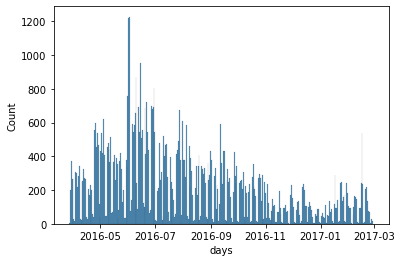

In [94]:
#plotting histogram for timestamp for how recent the article is

df['days']=pd.to_datetime(df.event_timestamp_x,unit='s').dt.date
sns.histplot(x= df['days'], bins = 50)

#### Interaction

Now, Based on user's interaction with the articles i.e. watched, liked, followed, downloaded - Most popular

<AxesSubplot:>

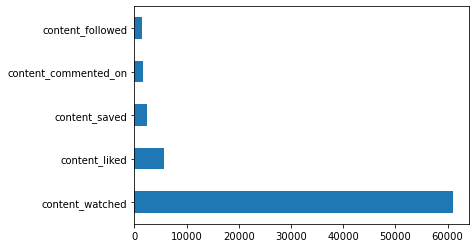

In [95]:
df_consumer['interaction_type'].value_counts().plot(kind='barh')

<AxesSubplot:>

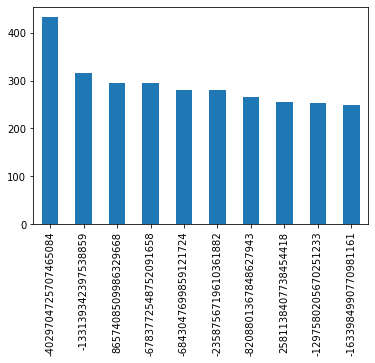

In [96]:
# Popular items

df_consumer['item_id'].value_counts()[:10].plot(kind='bar')

#### Region

In [97]:
# Top regions of the product

df.producer_location.value_counts().index[:10]

Index(['SP', 'MG', 'NJ', 'NY', 'ON', 'GA', 'FL', 'IL', 'RJ', 'TX'], dtype='object')

In [136]:
def preprocess(text):
    
   text = text.lower()
   doc = word_tokenize(text)
   doc = [word for word in doc if word not in stop_words]
   doc = [word for word in doc if word.isalpha()]
    
   return doc

These are the top 10 Regions where we have the most interactive. Thus the regions above can be used in our reconmmended system. 

### Proposed Recommendation Engine. 

#### Ten reconmmend products/articles includes - Four recently popular articles + Three all time popular + Three region specific popular articles  

- Note: We need to ensure that the system does not recommend any news article that has been pulled out from the app or has already been seen by the user. Thus, all the articles are that are "pulled out" or pre-viewed articles by the user that have already been seen will excluded. Soo, all the articles that are recommended will be new to the user

In [98]:
df.columns

Index(['event_timestamp_x', 'interaction_type_x', 'item_id', 'consumer_id',
       'consumer_session_id', 'consumer_device_info', 'consumer_location',
       'country', 'event_timestamp_y', 'producer_id', 'producer_session_id',
       'producer_device_info', 'producer_location', 'producer_country',
       'item_type', 'item_url', 'title', 'text_description', 'language',
       'days'],
      dtype='object')

In [99]:
def recommed_system1(cons_id):
    '''
    This function takes consumer ID as input and returns 10 recommended products as explained above.
    
    cons_id : Consumer ID
    return : List of 10 products
    
    '''
    # Top 4 recently popular products
    
    dftmp=df[df.consumer_id!=cons_id]
    dftmp=dftmp[dftmp.days>=datetime(2017,1,1).date()]
    dftmp=dftmp[dftmp.interaction_type_x=='content_watched']
   
    recent=list(dftmp['item_id'].value_counts().index[:4])
    
    #Top 3 overall popular
    
    dftmp=df[df.consumer_id!=cons_id]
    dftmp=dftmp[dftmp.interaction_type_x=='content_watched']
    dftmp=dftmp[~dftmp.item_id.isin(recent)] 
    #it shouldn't be from previously included items
    
    overall=list(dftmp['item_id'].value_counts().index[:3])
    
    # Top 3 in that region - 
    
    k=df[df.consumer_id==cons_id].producer_location.value_counts().index[0]
    
    if k in ['SP', 'MG', 'NJ', 'NY', 'ON', 'GA', 'FL', 'IL', 'RJ', 'TX']:
        dftmp=df[df.consumer_id!=cons_id]
        dftmp=dftmp[(dftmp.interaction_type_x=='content_watched')&(dftmp.producer_location==k)]
        dftmp=dftmp[~dftmp.item_id.isin(recent+overall)]
        region=list(dftmp['item_id'].value_counts().index[:3])
    else:
        dftmp=df[df.consumer_id!=cons_id]
        dftmp=dftmp[dftmp.interaction_type_x=='content_watched']
        dftmp=dftmp[~dftmp.item_id.isin(recent+overall)]
        region=list(dftmp['item_id'].value_counts().index[:3])
        
    return df[df.item_id.isin(recent+overall+region)][['item_id','title']].reset_index(drop=True).drop_duplicates()

In [100]:
# Test the engine
recommed_system1(-1032019229384696495)

,item_id,title
0,8657408509986329668,Pull request first - Practical Blend
294,-133139342397538859,"Novo workaholic trabalha, pratica esportes e t..."
609,-6783772548752091658,Livro: Retrospectivas Divertidas
903,5854206600849997966,The hardest thing in computer science
1042,-4333957157636611418,Why Programmers Want Private Offices
1234,3660989387512978561,Discutindo Devops na Prática
1377,-7113155163062752691,Arquitetura de Microserviços habilitando APIs ...
1508,-14569272361926584,Java 8 Streams - A Deeper Approach About Perfo...
1635,-4029704725707465084,Former Google career coach shares a visual tri...
2068,1469580151036142903,Don't document your code. Code your documentat...


So for a particular user, there is an id associated i.e. consumer_id. Thus, on providing a customer_id (for example: -1032019229384696495) the system recommends the top 10 articles that are most relevant to the user/ customer_id. 

### Content based recommendation system. 



Requirements: 
Only the articles that are written in the English language must be considered for content-based recommendations. 
The system should not recommend any news article that has been pulled out from the app or has already been seen by the user.

The final generated list must contain the names of the recommended articles, along with their IDs.

### Model 1 - Cosine similarity

In [101]:
def preprocess_sentences(text):
    '''
    This function takes the text sentence input and preprocess it to make compatible to NLP models being use
    
    text: text sentence
    
    return : processed sentence
    '''
    text = text.lower()
    temp_sent =[]
    words = nltk.word_tokenize(text)
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        if tags[i][1] in VERB_CODES:
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha():
            temp_sent.append(lemmatized)

    finalsent = ' '.join(temp_sent)
    finalsent = finalsent.replace("n't", " not")
    finalsent = finalsent.replace("'m", " am")
    finalsent = finalsent.replace("'s", " is")
    finalsent = finalsent.replace("'re", " are")
    finalsent = finalsent.replace("'ll", " will")
    finalsent = finalsent.replace("'ve", " have")
    finalsent = finalsent.replace("'d", " would")
    return finalsent

In [102]:
pc_present=df_platform[df_platform["interaction_type"]=="content_present"]

pc_present["all_text"]=pc_present["title"]+pc_present["text_description"]

pc_present.drop(["producer_device_info", "producer_location", "producer_country" ], axis=1, inplace=True)

pc_present.drop(["event_timestamp", "producer_id",
                 "producer_session_id", "item_url", "interaction_type"], axis=1, inplace=True)

In [103]:
pc_present["all_text_processed"]=pc_present["all_text"].apply(preprocess_sentences)

In [104]:
pc_present.columns

Index(['item_id', 'item_type', 'title', 'text_description', 'language',
       'all_text', 'all_text_processed'],
      dtype='object')

In [105]:
# Vectorizing pre-processed movie plots using TF-IDF

tfidfvec = TfidfVectorizer()
tfidf_movie = tfidfvec.fit_transform((pc_present["all_text_processed"]))
cos_sim = cosine_similarity(tfidf_movie, tfidf_movie)

pc_present = pc_present.set_index('item_id') 

pc_present.head()

,item_type,title,text_description,language,all_text,all_text_processed
item_id,,,,,,
-4110354420726924665,HTML,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,"Ethereum, a Virtual Currency, Enables Transact...",ethereum virtual currency enable transaction r...
-7292285110016212249,HTML,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en,Bitcoin Future: When GBPcoin of Branson Wins O...,bitcoin future gbpcoin branson win usdcoin tru...
-6151852268067518688,HTML,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en,Google Data Center 360° TourWe're excited to s...,google data center tourwe excite share google ...
2448026894306402386,HTML,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en,"IBM Wants to ""Evolve the Internet"" With Blockc...",ibm want evolve internet blockchain technology...
-2826566343807132236,HTML,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,en,IEEE to Talk Blockchain at Cloud Computing Oxf...,ieee talk blockchain cloud compute coindeskone...


In [106]:
# Storing indices of the data

indices = pd.Series(pc_present.index)

In [107]:
def recommendations(id, cosine_sim = cos_sim):
    
    recommended_articles = []
    clicked_article=pc_present.loc[[id]]
    text=clicked_article['all_text_processed'].values[0]
    ix = indices[indices == id].index[0]
    
    similarity_scores = pd.Series(cosine_sim[ix]).sort_values(ascending = False)
    
    top_10_articles = list(similarity_scores.iloc[1:11].index)
    
    for i in top_10_articles:
        recommended_articles.append(list(pc_present.index)[i])
        
        
    return pc_present.loc[recommended_articles].title

In [108]:
print("Top 10 articles similar to the clicked ones are - ")

#Insert the clicked item id to get top 10 recommendations
#For example if item clicked is - 5274322067107287523

cosine = recommendations(5274322067107287523)
cosine

Top 10 articles similar to the clicked ones are - 


item_id
-4110354420726924665    Ethereum, a Virtual Currency, Enables Transact...
 3353902017498793780    The Rise And Growth of Ethereum Gets Mainstrea...
 1485652648052127324    For Blockchain VCs, the Time for Ethereum Inve...
 8084284001249507595    Microsoft Continues to Embrace Ethereum & Bitc...
-1868297195590431285    Blockchain CEO's Business Advice on Bitcoin St...
 1266958185239582088    Are you a bitcoin denialist? - Chris Skinner's...
-6713697716910928909    Solidity Available in Visual Studio - Ethereum...
-2273517184910006534    Venture Capitalists Inject Nearly Half a Billi...
 4849766494522371290    Cashila Announces Convenient Buy and Sell Feat...
 3067875254349597654    Microsoft Adds Ethereum to Windows Platform Fo...
Name: title, dtype: object

For every click on an article, there is an Item_id associated with it. 
Thus, on providing an item id (for example:5274322067107287523) the system recommends the top 10 articles that are most relevant and most similar to the articles that have been previously clicked by the user. 

### Model 2 - K-means clustering

- Encode the item text using tfidf tokenzer and then use K-Means clustering to create clusters of the doc. 
- Once we create the clusters, we can recommend the items from the same clusters. 

In [109]:
dfkmn=df.copy()
dfkmn=dfkmn[dfkmn.language=='en']

In [110]:
# combine all the relevent text for an item_id

dfkmn['all_text']=dfkmn['title']+dfkmn['text_description']
dfkmn['all_text']=dfkmn[['all_text','item_id']].groupby('item_id').transform(lambda x:' '.join(x))
dftmp=dfkmn[['all_text','item_id']].drop_duplicates()

In [111]:
dftmp

,all_text,item_id
0,Hiri wants to fix the workplace email problemH...,-3499919498720038879
20,Top 10 Intranet Trends of 2016Summary: Hero im...,8890720798209849691
306,How This Googler Redesigned The WorkweekJake K...,-7820640624231356730
326,Chrome DevTools - Console API ReferenceThe Dev...,-1492913151930215984
380,"Google, Amazon and the upcoming battle over AI...",3064370296170038610
...,...,...
72660,Yahoo discloses hack of 1 billion accountsYaho...,-7034660627992927630
72670,Oculus acquires eye-tracking startup The Eye T...,8057379878708189245
72673,"Copyrighting DNA Is a Bad IdeaA few years ago,...",7029834616968294970
72675,The Ultimate Digital Clean-Up Checklist: Are Y...,-7108012586837980940


In [112]:
# vectorize the text doc

vectorizer = TfidfVectorizer(stop_words='english',max_features=7500)
docs=vectorizer.fit_transform(dftmp.all_text)

In [113]:
kmeans = KMeans(16)
clstrs=kmeans.fit_predict(docs)
dftmp['clusters']=clstrs

In [114]:
def recommend_kmeans(item_id):
    
    a=int(dftmp[dftmp.item_id==item_id].clusters)
    lst=list(dftmp[dftmp.clusters==a].item_id)
    lst=[i for i in lst if i !=item_id][:10]
    
    return dfkmn[dfkmn.item_id.isin(lst)][['item_id','title']].drop_duplicates()

In [115]:
print("10 similar articles using kmeans clustering - ")

#Insert the clicked item id to get top 10 recommendations
# here if item clicked is - 5274322067107287523

kmns=recommend_kmeans(5274322067107287523)
kmns

10 similar articles using kmeans clustering - 


,item_id,title
1157,3727587882617538492,Bitcoin In The Time Of Negative Interest Rates
1167,-692972306229904743,Blockchain won't kill banks: Bitcoin pioneer
1431,1431351528207086249,Global Blockchain Forum Launched to Coordinate...
1447,5508043659570633487,Using Blockchain to Authenticate University Di...
1463,2871648046424590878,UK Regulators Declare Start of
1558,5772565485432112058,U.S. State Department Recommends Development o...
4299,-6713697716910928909,Solidity Available in Visual Studio - Ethereum...
8399,7845570490247450966,How To Benefit From Getting Paid in Bitcoin
8999,7933360486658437274,Brazil's Bank Itaú Joins R3 Blockchain Consort...
10363,-6142462826726347616,CoinFest 2016: Uniting the World's Bitcoiners


### Model 3 - Using Topic Modelling

We'll use LDA to generate the topics for the document. And then we can recommend the articles with similar topics.

In [116]:
dftpc=df.copy()
dftpc=dftpc[dftpc.language=='en']

In [117]:
# combine all the relevent text for an item_id

dftpc['all_text']=dftpc['title']+dftpc['text_description']
dftpc['all_text']=dftpc[['all_text','item_id']].groupby('item_id').transform(lambda x:' '.join(x))
dftmp2=dftpc[['all_text','item_id']].drop_duplicates()

In [118]:
class LemmaTokenizer(object):
    
    def __init__(self):
        self.wnl = WordNetLemmatizer()

    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [119]:
# vectorize the text doc

vectorizer = TfidfVectorizer(stop_words='english',max_features=7500,max_df=0.9)
docs=vectorizer.fit_transform(dftmp2.all_text)

In [120]:
vocab=vectorizer.get_feature_names()

In [121]:
lda = LatentDirichletAllocation(n_components=16)
tpc=lda.fit_transform(docs)

In [122]:
words_list= lda.components_

In [123]:
# Checking top 15 words in each topic

def get_top15(ind):
    lst=np.argsort(ind)[:-16:-1]
    return [vocab[i] for i in lst]

for i in words_list:
    print('\nTop words from this Topic')
    print(get_top15(i))


Top words from this Topic
['tribe', 'kubectl', 'containerd', 'hhvm', 'aquifer', 'l4', 'bytecode', 'autoscaler', 'taxicab', 'daos', 'mentoring', 'zend', 'proguard', 'pending', 'retrolambda']

Top words from this Topic
['react', 'js', 'japanese', '3d', 'swift', 'availability', 'category', 'bash', 'detection', 'item', 'tickets', 'syntax', 'door', 'tags', 'dna']

Top words from this Topic
['acquia', 'adobe', 'dao', 'trump', 'parsey', 'viv', 'syntaxnet', 'fasttext', 'los', 'angeles', 'brooklyn', 'frank', 'omnichannel', 'mcparseface', 'charlie']

Top words from this Topic
['cozmo', 'webassembly', 'openbazaar', 'ionic', 'torus', 'cordova', 'numpy', 'icloud', 'callahan', 'scipy', 'watermark', 'cowboy', 'gv', 'tensorboard', 'etcd']

Top words from this Topic
['hbr', 'spanner', 'magazine', 'articles', 'interviewer', 'bock', 'mobify', 'descartes', 'spinner', 'compound', 'qunit', 'mary', 'trooly', 'meeker', 'usda']

Top words from this Topic
['apfs', 'globo', 'kik', 'beacon', 'insightful', 'pebbl

If we observe output above - top 15 words in each, we notice that they have  been clustered in similar docs

For example - 

Top words from one of the topics are -
'google', 'data', 'new', 'learning', 'like', 'cloud', 'time', 'use', 'people', 'app', 'code', 'just', 'machine', 'drupal', 'work'

It can be observed that the these words are from topics similar to technology - goodle, data, cloud etc. 

Similarly for another topic -
'blockchain', 'bitcoin', 'bank', 'banks', 'banking', 'financial', 'kubernetes', 'ethereum', 'fintech', 'payments', 'currency', 'digital', 'payment', 'institutions', 'ledger'

There's no denying in saying that topic has clustered words reated to digital currency/ cryptocurrency or payments and storage. 

 Now, Let's Recommend articles based on above clustering

In [124]:
clstrs=[np.argmax(i) for i in tpc]
dftmp2['clusters']=clstrs

def recommend_topic(item_id):
    
    a=int(dftmp2[dftmp2.item_id==item_id].clusters)
    lst=list(dftmp2[dftmp2.clusters==a].item_id)
    lst=[i for i in lst if i !=item_id][:10]
    
    return dftpc[dftpc.item_id.isin(lst)][['item_id','title']].drop_duplicates()

In [125]:
print("10 similar articles using Topic Modeling - ")

#Insert the clicked item id to get top 10 recommendations
# here if item clicked is - 5274322067107287523

tpmdl=recommend_topic(5274322067107287523)
tpmdl

10 similar articles using Topic Modeling - 


,item_id,title
0,-3499919498720038879,Hiri wants to fix the workplace email problem
20,8890720798209849691,Top 10 Intranet Trends of 2016
306,-7820640624231356730,How This Googler Redesigned The Workweek
326,-1492913151930215984,Chrome DevTools - Console API Reference
380,3064370296170038610,"Google, Amazon and the upcoming battle over AI..."
428,7763750328910542816,This Japanese Restaurant Is Decked out With Ya...
436,2372438485070148864,The Continuous Delivery Maturity Model
614,-348408475077850711,Introduction to release engineering
699,6521856301289868251,Notes on Reactive Programming Part I: The Reac...
784,7943088471380012839,Torus


To check the accurary of the three models, we'll be using Latent Semantic Indexing or LSI score. It measures the text similarity. Text similarity has to determine how ‘close’ two pieces of text are both in surface closeness (lexical similarity) and meaning (semantic similarity). This is achieved by reducing the dimensionality of the document vectors by applying latent semantic analysis.

In [127]:
#LSI score for Model-1 (Cosine Similarity)

dfcos=dftmp2[dftmp2.item_id.isin(cosine.index)].all_text
corpus = [preprocess(text) for text in dfcos.tolist()]

In [128]:
dictionary = corpora.Dictionary(corpus)
corpus_gensim = [dictionary.doc2bow(doc) for doc in corpus]
tfidf = TfidfModel(corpus_gensim)
corpus_tfidf = tfidf[corpus_gensim]
lsi = LsiModel(corpus_tfidf, id2word=dictionary)
lsi_index = MatrixSimilarity(lsi[corpus_tfidf])
sim_matrix = np.array([lsi_index[lsi[corpus_tfidf[i]]]
                                for i in range(len(corpus))])

In [129]:
# LSI score

np.sum(sim_matrix)/(len(corpus)**2)

0.20825481414794922

In [130]:
# LSI score for Model - 2 (kmeans clustering)

dfcos=dftmp2[dftmp2.item_id.isin(kmns.item_id)].all_text
corpus = [preprocess(text) for text in dfcos.tolist()]

In [131]:
dictionary = corpora.Dictionary(corpus)
corpus_gensim = [dictionary.doc2bow(doc) for doc in corpus]
tfidf = TfidfModel(corpus_gensim)
corpus_tfidf = tfidf[corpus_gensim]
lsi = LsiModel(corpus_tfidf, id2word=dictionary)
lsi_index = MatrixSimilarity(lsi[corpus_tfidf])
sim_matrix = np.array([lsi_index[lsi[corpus_tfidf[i]]]
                                for i in range(len(corpus))])

In [132]:
# LSI score

np.sum(sim_matrix)/(len(corpus)**2)

0.12610627174377442

In [133]:
# LSI score for model - 3 (Topic Modeling)

dfcos=dftmp2[dftmp2.item_id.isin(tpmdl.item_id)].all_text
corpus = [preprocess(text) for text in dfcos.tolist()]

In [134]:
dictionary = corpora.Dictionary(corpus)
corpus_gensim = [dictionary.doc2bow(doc) for doc in corpus]
tfidf = TfidfModel(corpus_gensim)
corpus_tfidf = tfidf[corpus_gensim]
lsi = LsiModel(corpus_tfidf, id2word=dictionary)
lsi_index = MatrixSimilarity(lsi[corpus_tfidf])
sim_matrix = np.array([lsi_index[lsi[corpus_tfidf[i]]]
                                for i in range(len(corpus))])

In [135]:
# LSI score

np.sum(sim_matrix)/(len(corpus)**2)

0.11970484733581543

### Observations:

LSI score of the models 


- Cosine similarity : 0.208
- K-means clustering : 0.1263
- Topic Modeling : 0.1197


Model 1 Cosine similarity has the highest LSI score out of the three models. Thus, We can conclude that it suggests most relevant and new articles precisely similar to the ones clicked. 